In [ ]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Cell 2
%cd /content/drive/MyDrive/'hw1.zip (Unzipped Files)'/hw1/student_version/data # or your custom path
!sh get_data.sh
%cd ..

In [ ]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory
!python -m unittest tests.test_network

In [1]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [3]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v
  
  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])
  
  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)
  
  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))
  
  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [ ]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

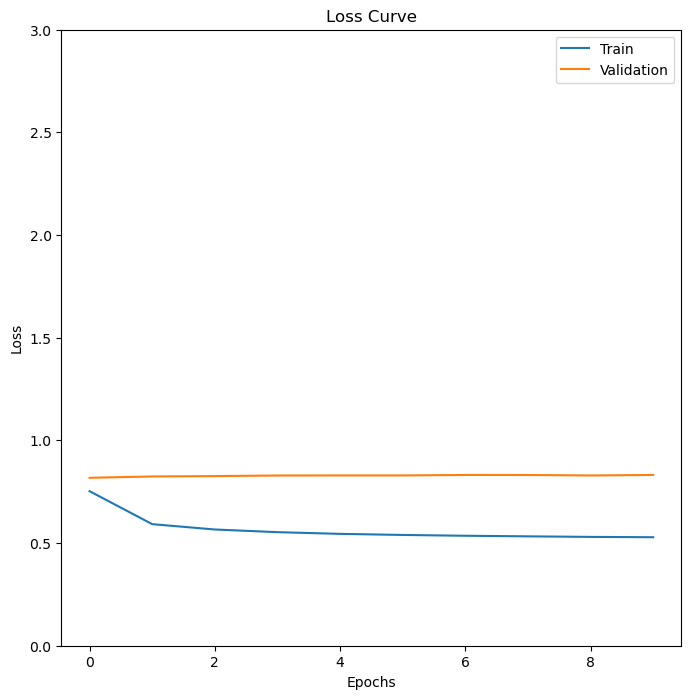

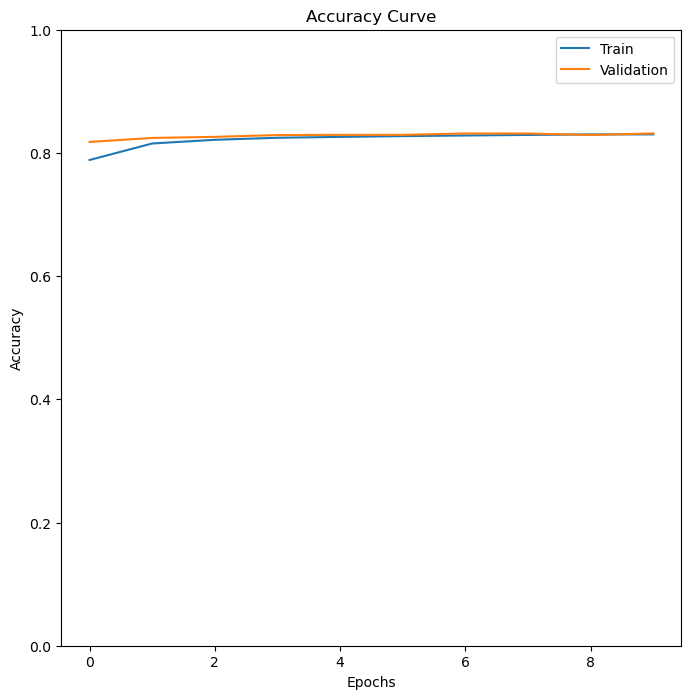

In [5]:
# Cell 7
# plot results for softmax model
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

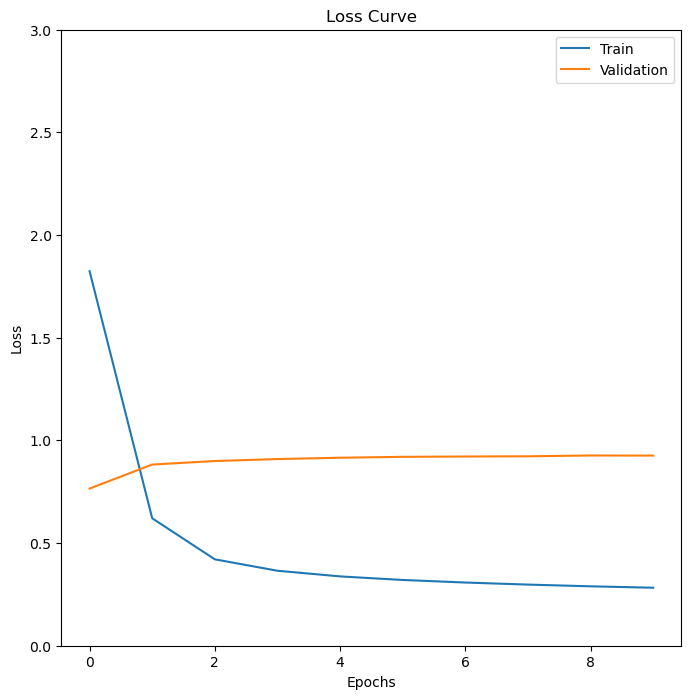

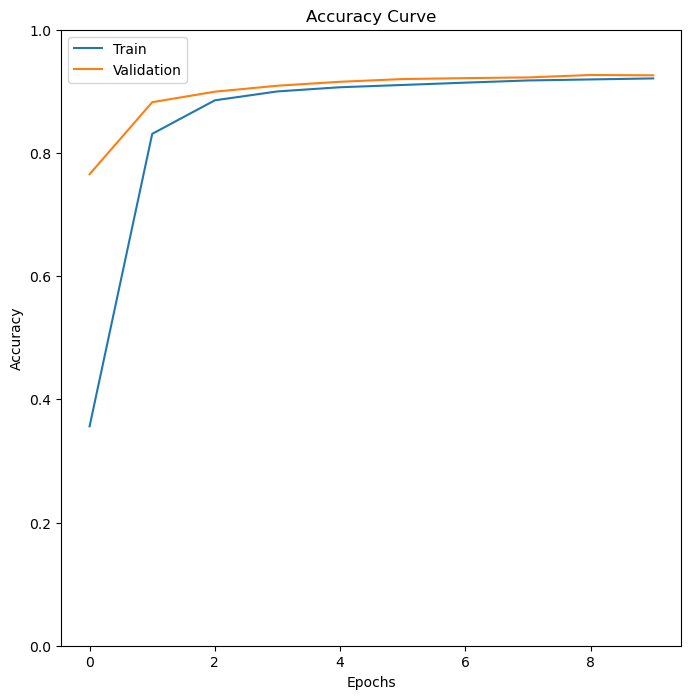

In [7]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Arthur Scaquetti do Nascimento
- GT Email: anascimento7@gatech.edu
- GT ID: 903721549



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [ ]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

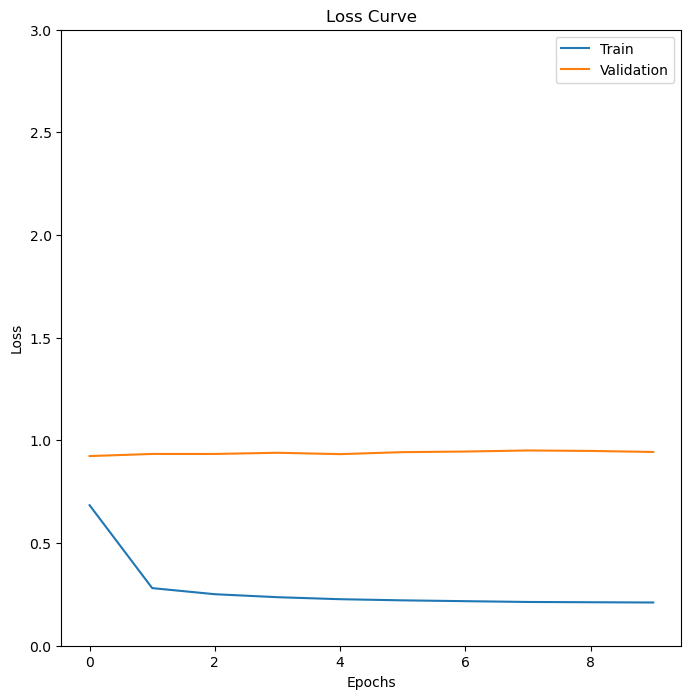

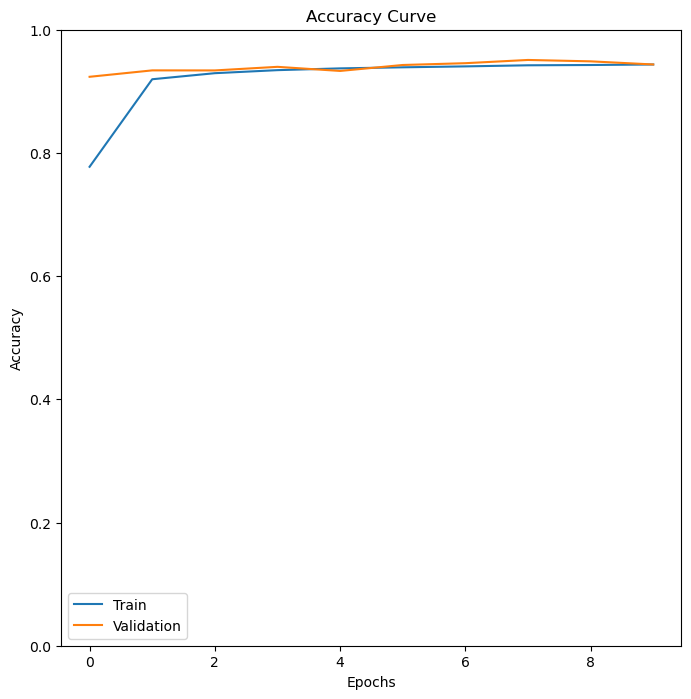

In [11]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

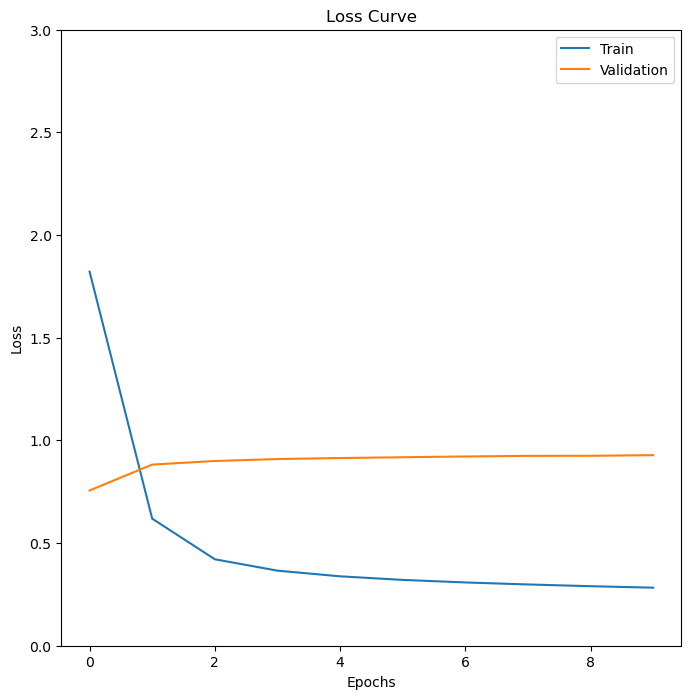

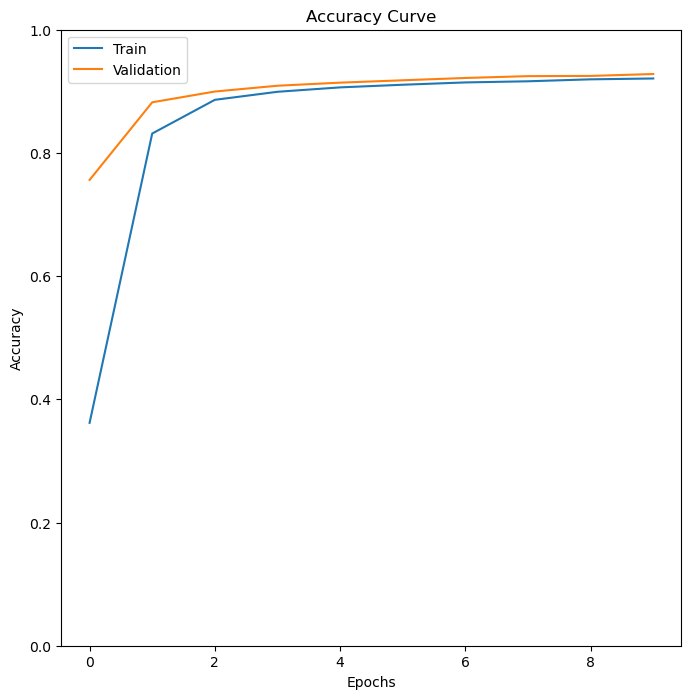

In [13]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

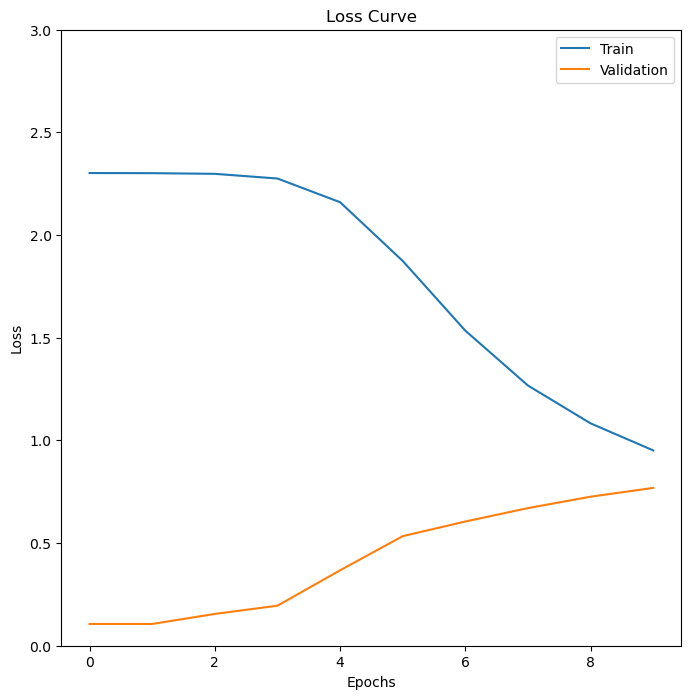

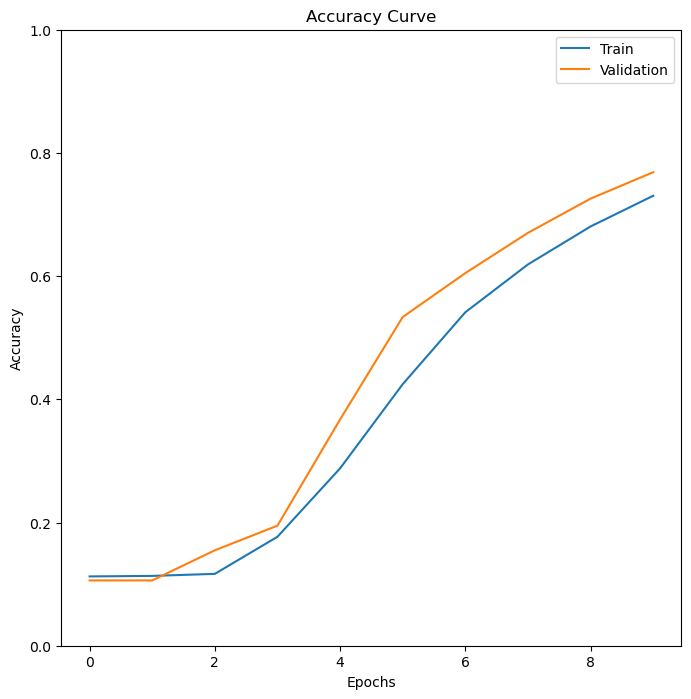

In [15]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

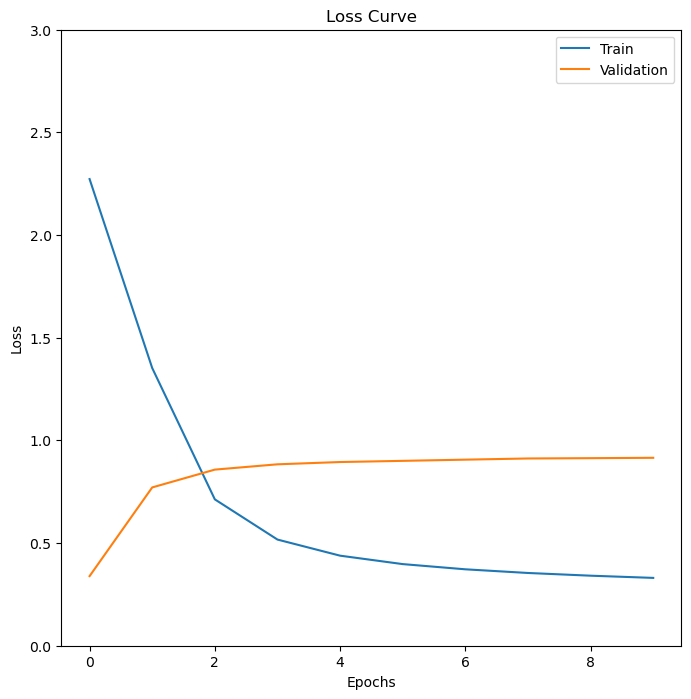

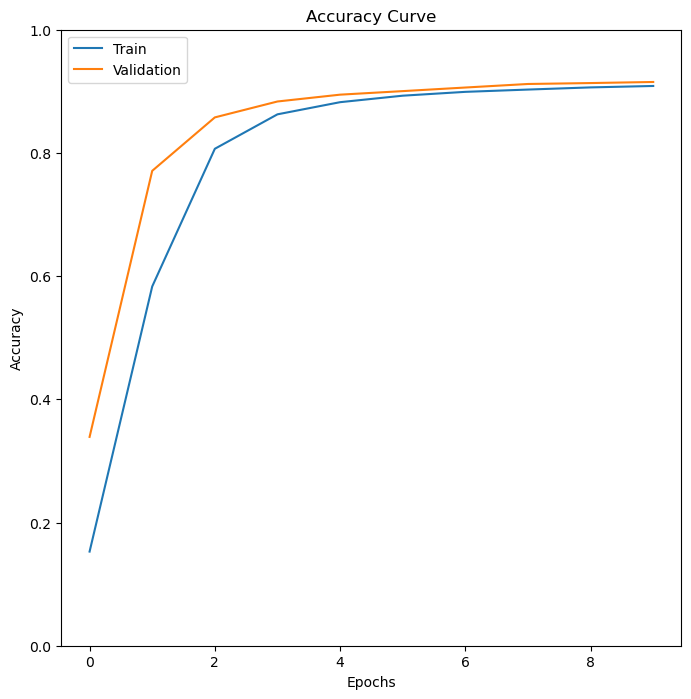

In [17]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

Experimentally (as shown in the plots above), we observe that as the learning rate ($\eta$) decreses, the training and validation accuracies, and training loss slowly decrease, while the validation loss keeps at about the same level -- but just up to a certain point: if the learning rate is too low, then the MLP is not able to learn properly in the given amount of epochs.

That is because the loss function ($J(\theta)$, where $\theta$ are the weights of the model) is well-behaved and the weights updates given by the gradient descent algorithm, i.e.,  $\theta^{t+1} = \theta^{t} - \eta \nabla_{\theta} J(\theta)$, will be minimal once the learning rate is low enough, either requiring more epochs, or being completely insufficient.



# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1


Arthur's NOTE: keeping lr = 0.1 (original)

Original reg = 0.001

In [ ]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

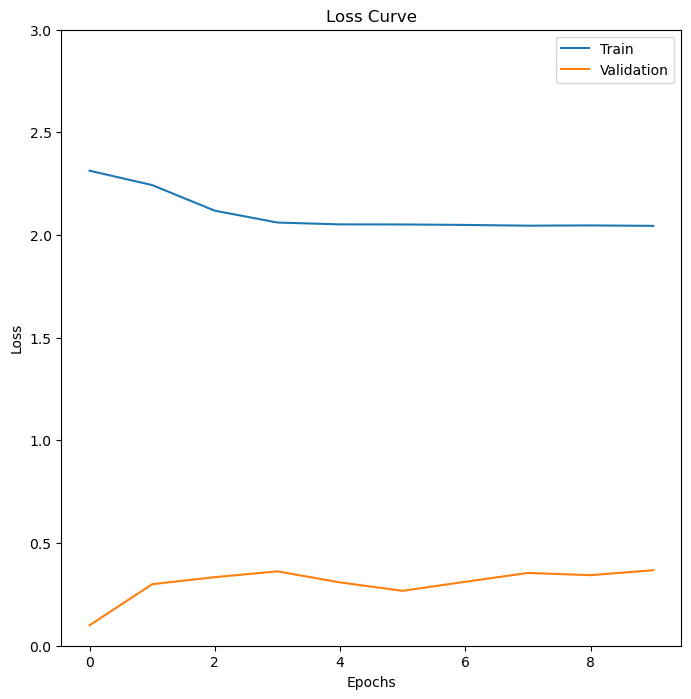

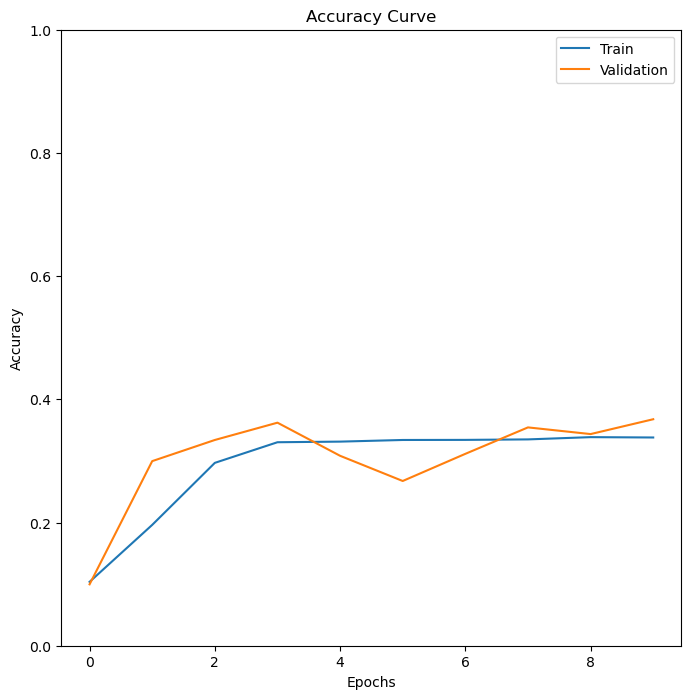

In [19]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

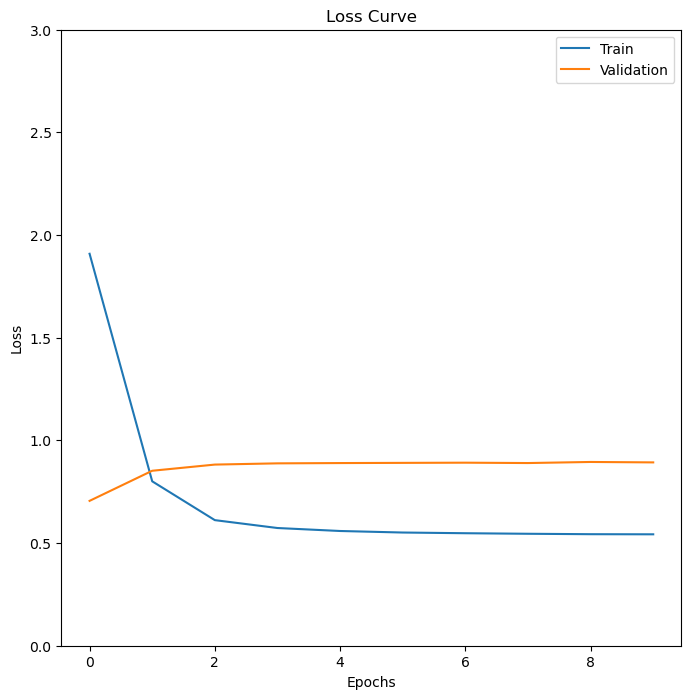

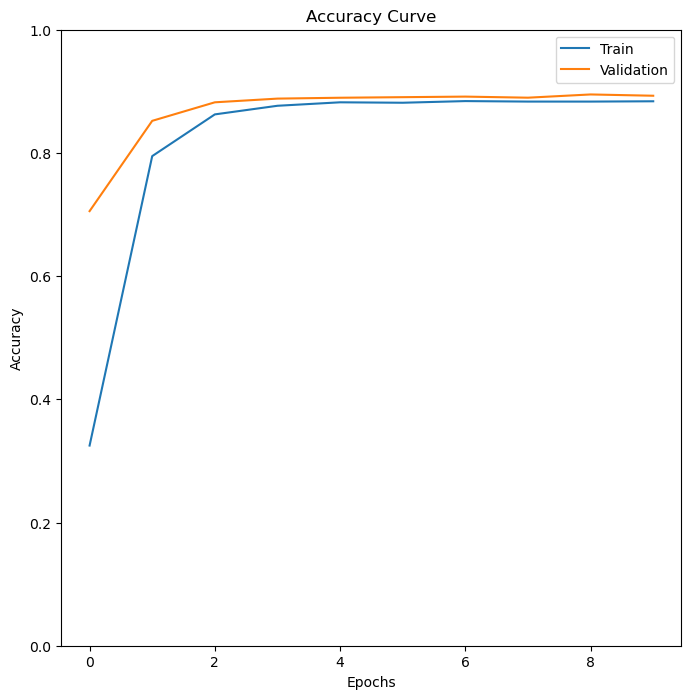

In [21]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

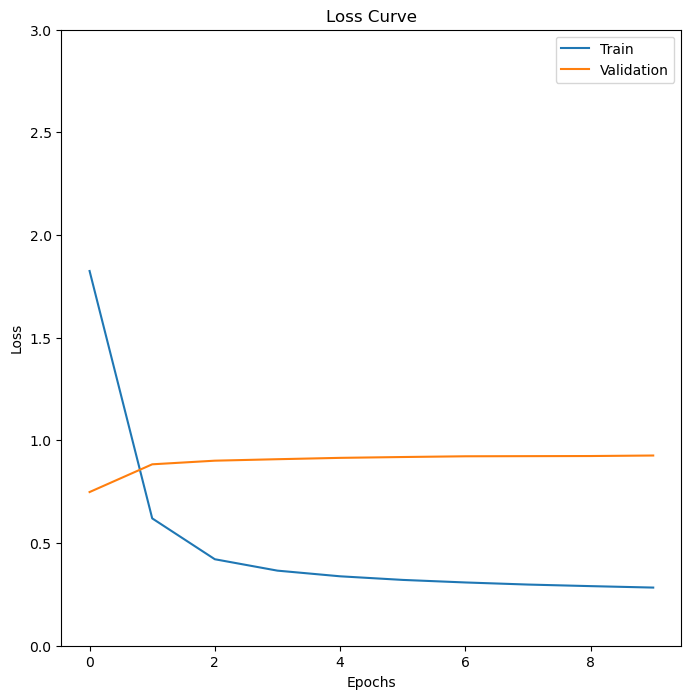

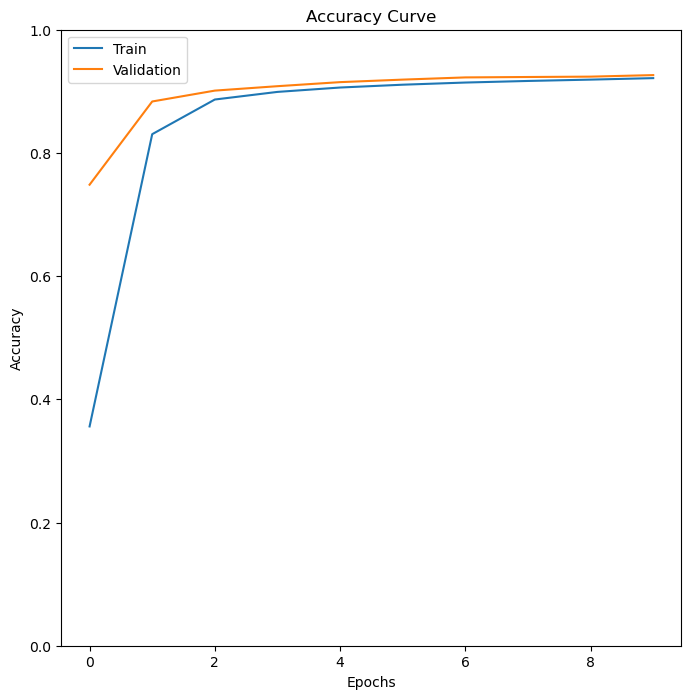

In [23]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

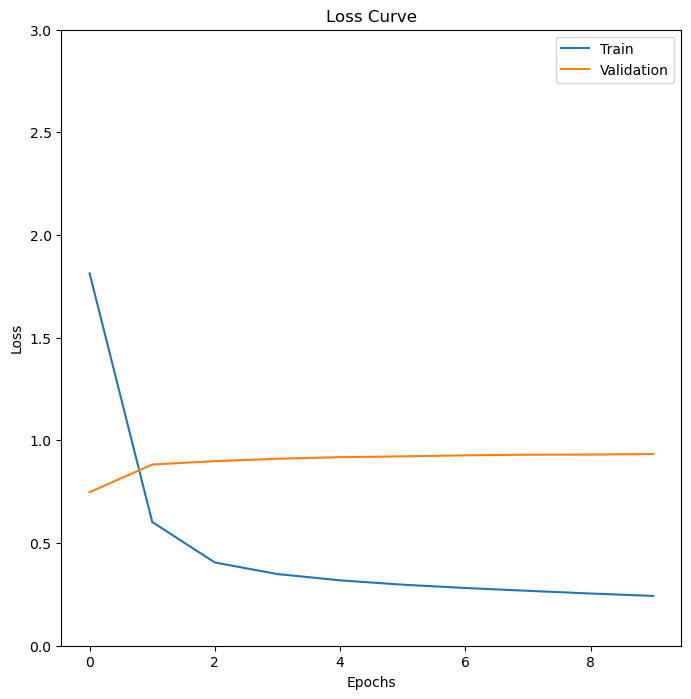

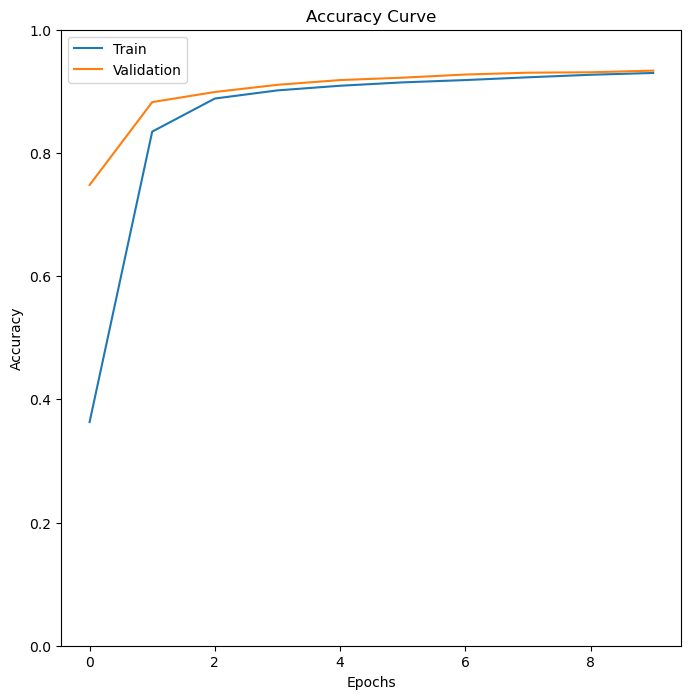

In [25]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_hi64story, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

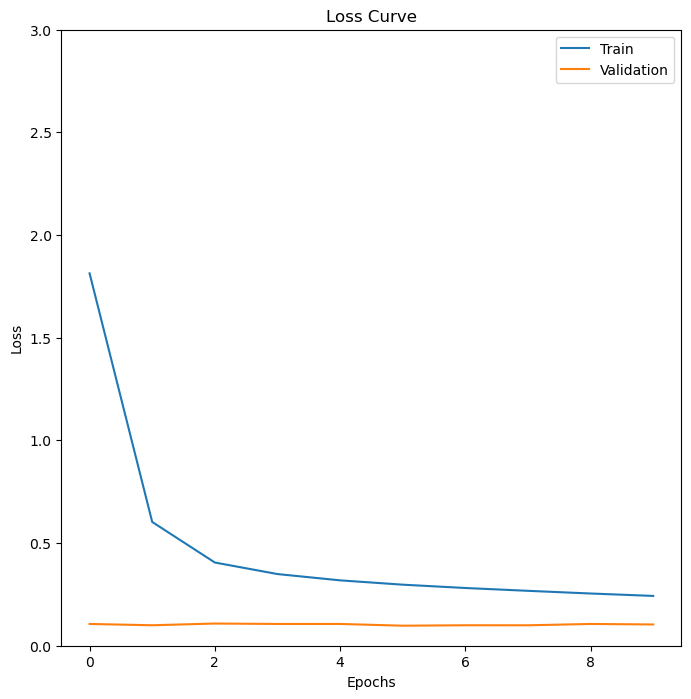

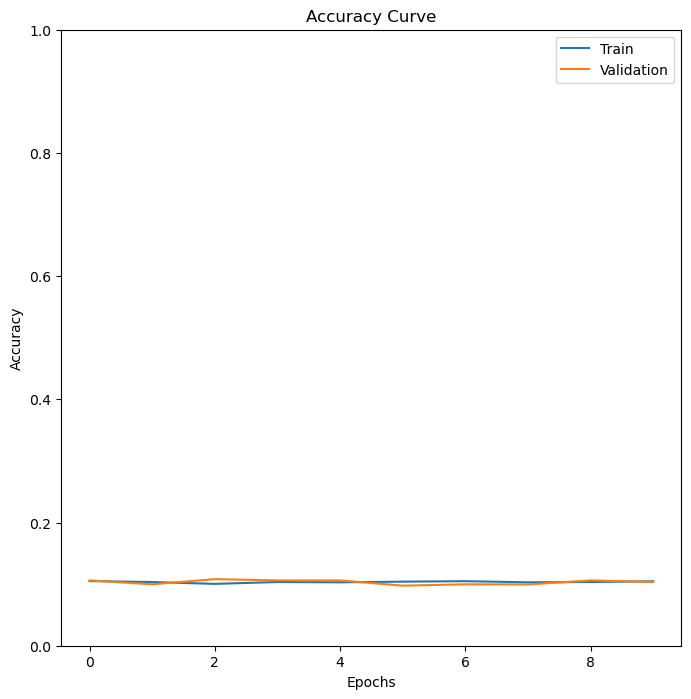

In [28]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

With the plots above, we empirically observe that the higher the regularization coefficient ($\lambda$) is, the worse the model performs. That is up to a certain point, i.e. there isn't much difference between $\lambda = 0.001$ and $\lambda = 0.0001$.

This is explained because the regularization term is supposed to give the model some "slack" or "room to play" during the optimization phase. It essentially means that it can sacrifice increasing a little bit the settling loss to in return be more generalizable. This is evident when looking at the regularization formula : $$ J(\theta) = L_{CE} + \lambda \frac{1}{2} \sum_{i=1}^N \omega_i^2 $$

We can see that if $\lambda$ is not low enough, we are summing numbers that might be too high, therefore compromizing the fidelity of the value of the loss to its actual meaning.

## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

In [ ]:
# Cell 28
# hyperparameter tuning
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

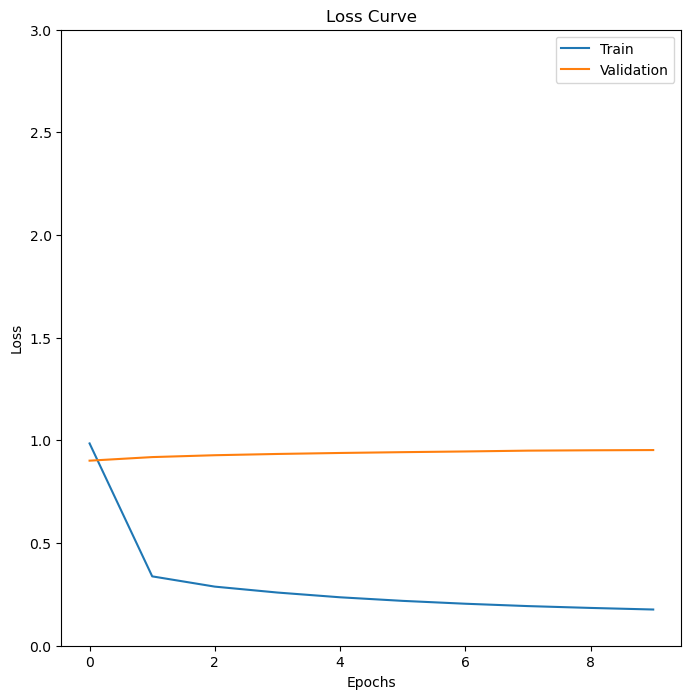

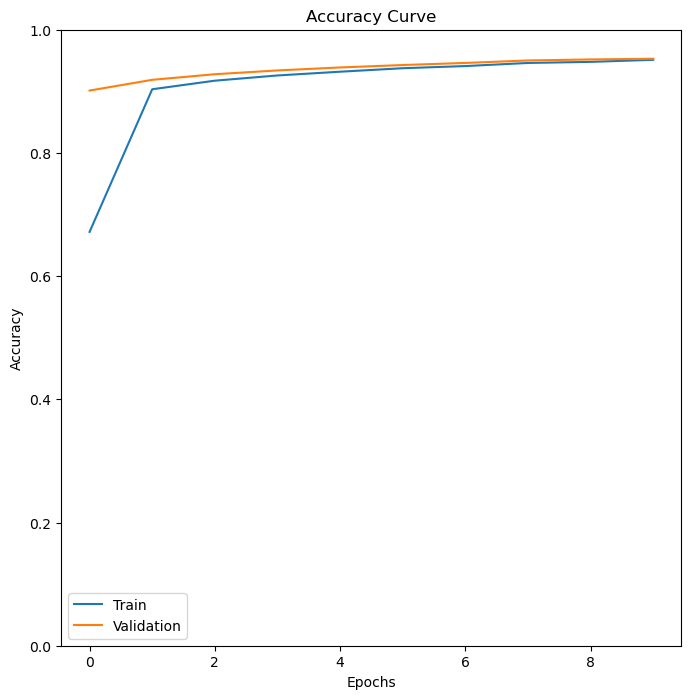

In [32]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 30
#To collect submission
!sh collect_submission.sh

Describe and explain your findings here:

Best model: $\eta = 0.3$; $\lambda = 0.0005$. 

Important to note: I only played with those two variables since they were the only two that the notebook had us play with. On that note, I think that given enough epochs, many different combinations of $\eta$ and $\lambda$ would end up performing just as good; batch size would not affect the results that much (if kept between 16 and 64), but would increase the computation time for samller batches; momentum should not be a deciding factor, but is in a good level; and changing the hidden size would make the comparisons unfair given that we would essitially be changing the architecture (network's width).

As seen in previous experiments, the regularization coefficient $\lambda$ that worked better was somewhere between $10^{-3}$ and $10^{-4}$, so that was the range which was more promissing. Simmilarly, we observed that lower learning rates $\eta$ for the same number of epochs were not as well-performing, so I chose to play in the range of 0.1 to 1, while avoiding taking steps too large.